In [1]:
from cobra.io import read_sbml_model
model = read_sbml_model('iML1515.xml')

In [2]:
for reaction in model.metabolites.gam_c.reactions:
    print(reaction.id, reaction, reaction.name)

MC6PH MC6PH: h2o_c + mchtbs6p_c --> acgam6p_c + gam_c Monoacetylchitobiose-6-phosphate hydrolase


In [3]:
print(model.objective)

Maximize
1.0*BIOMASS_Ec_iML1515_core_75p37M - 1.0*BIOMASS_Ec_iML1515_core_75p37M_reverse_35685


In [4]:
model.optimize().fluxes["MC6PH"]

0.0

In [5]:
model.medium

{'EX_pi_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_zn2_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_ca2_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_sel_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_cl_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_tungs_e': 1000.0,
 'EX_slnt_e': 1000.0}

In [6]:
model.reactions.EX_chtbs_e.lower_bound = -1000.0
model.reactions.EX_chtbs_e.upper_bound = 1000.0

In [7]:
model.reactions.EX_chtbs_e

Reaction identifier,EX_chtbs_e
Name,Chitobiose exchange
Memory address,0x1bd31aa0490
Stoichiometry,"chtbs_e <=> N,N'-diacetylchitobiose <=>"
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [10]:
medium = model.medium
with model:
    medium['EX_chtbs_e'] = 1000
    model.medium = medium
    # model.objective = model.reactions.BIOMASS_Ec_iML1515_core_75p37M
    model.objective = model.reactions.MC6PH
    model.objective = {
                      model.reactions.BIOMASS_Ec_iML1515_core_75p37M: 0.2,
                      }
    model.reactions.BIOMASS_Ec_iML1515_core_75p37M.lower_bound = model.optimize().objective_value
    model.add_boundary(model.metabolites.gam_c, type='demand')
    solution = model.optimize()
    print(solution.fluxes[solution.fluxes != 0])
    print(solution.fluxes["MC6PH"])
    print(solution.fluxes["BIOMASS_Ec_iML1515_core_75p37M"])
    print(model.reactions.DM_gam_c)

SHK3Dr                              9.397445
DHORTS                             -8.156580
OMPDC                               8.156580
G5SD                                5.450665
CS                                506.489716
                                     ...    
4HTHRK                              0.016496
BIOMASS_Ec_iML1515_core_75p37M     24.657508
OPHHXy                              0.005499
MC6PH                             519.654393
DM_gam_c                          519.654393
Name: fluxes, Length: 456, dtype: float64
519.654392613863
24.657507602391977
DM_gam_c: gam_c --> 


In [12]:
# from cobra import Reaction
# medium = model.medium
# with model:
#     medium['EX_chtbs_e'] = 0
#     # gene integration
#     reaction = Reaction("asdf")
#     reaction.name = "name of reaction"
#     reaction.subsystem = "some metabolsim"
#     reaction.lower_bound = -1000
#     reaction.upper_bound = 1000

#     reaction.add_metabolites({
#         model.metabolites.get_by_id("glcn_c"): -1.0,
#         model.metabolites.get_by_id("gln__L_c"): -1.0,
#         model.metabolites.get_by_id("gam_c"): 1.0,
#         model.metabolites.get_by_id("glu__L_c"): 1.0
#     })
#     model.add_reactions([reaction])
#     model.medium = medium
#     model.objective = model.reactions.asdf
#     model.add_boundary(model.metabolites.gam_c, type='demand')
#     solution = model.optimize()
#     print(solution.fluxes[solution.fluxes != 0])
#     print(solution.fluxes["asdf"])

In [13]:
model.genes.get_by_id("b4025")

Gene identifier,b4025
Name,pgi
Memory address,0x1bd2fcf5370
Functional,True
In 1 reaction(s),PGI


In [14]:
model.reactions.PGI

Reaction identifier,PGI
Name,Glucose-6-phosphate isomerase
Memory address,0x1bd30158d00
Stoichiometry,g6p_c <=> f6p_c D-Glucose 6-phosphate <=> D-Fructose 6-phosphate
GPR,b4025
Lower bound,-1000.0
Upper bound,1000.0


In [15]:
model.slim_optimize()
model.reactions.PGI.flux

7.644633780206022

In [16]:
model.reactions.GF6PTA

Reaction identifier,GF6PTA
Name,Glutamine-fructose-6-phosphate transaminase
Memory address,0x1bd31456eb0
Stoichiometry,f6p_c + gln__L_c --> gam6p_c + glu__L_c D-Fructose 6-phosphate + L-Glutamine --> D-Glucosamine 6-phosphate + L-Glutamate
GPR,b3729
Lower bound,0.0
Upper bound,1000.0


In [17]:
model.slim_optimize()
model.reactions.GF6PTA.flux

0.08286571279677561

In [18]:
model.genes.get_by_id("b0677")

Gene identifier,b0677
Name,nagA
Memory address,0x1bd2fde4160
Functional,True
In 1 reaction(s),AGDC


In [19]:
model.reactions.AGDC

Reaction identifier,AGDC
Name,N-acetylglucosamine-6-phosphate deacetylase
Memory address,0x1bd31345fa0
Stoichiometry,acgam6p_c + h2o_c --> ac_c + gam6p_c N-Acetyl-D-glucosamine 6-phosphate + H2O H2O --> Acetate + D-Glucosamine 6-phosphate
GPR,b0677
Lower bound,0.0
Upper bound,1000.0


In [20]:
model.genes.get_by_id("b0679")

Gene identifier,b0679
Name,nagE
Memory address,0x1bd2fe600d0
Functional,True
In 1 reaction(s),ACGAptspp


In [32]:
model.reactions.ACGAptspp.genes

frozenset({<Gene b0679 at 0x1bd2fe600d0>,
           <Gene b1101 at 0x1bd2fe60220>,
           <Gene b2415 at 0x1bd2fdb57f0>,
           <Gene b2416 at 0x1bd2fdb5910>,
           <Gene b2417 at 0x1bd2fe47490>})

In [22]:
for reaction in model.metabolites.acgam6p_c.reactions:
    print(reaction.id, reaction, reaction.name)

ACGAMK ACGAMK: acgam_c + atp_c --> acgam6p_c + adp_c + h_c N-acetylglucosamine kinase
ACM6PH ACM6PH: acmum6p_c + h2o_c --> acgam6p_c + lac__D_c N-acetylmuramate 6-phosphate hydrolase
ACGAptspp ACGAptspp: acgam_p + pep_c --> acgam6p_c + pyr_c N-Acetyl-D-glucosamine transport via PEP:Pyr PTS  (periplasm)
MC6PH MC6PH: h2o_c + mchtbs6p_c --> acgam6p_c + gam_c Monoacetylchitobiose-6-phosphate hydrolase
AGDC AGDC: acgam6p_c + h2o_c --> ac_c + gam6p_c N-acetylglucosamine-6-phosphate deacetylase
AMANAPEr AMANAPEr: acmanap_c <=> acgam6p_c N-acetylmannosamine 6-phosphate epimerase


In [25]:
genes = ["b0677", "b0678", "b0679", "b1817", "b1818", "b1819"]
essentiality = {}
for gene in genes:
    with model:
        model.genes.get_by_id(gene).knock_out()
        essentiality[gene] = model.slim_optimize(error_value=0.)

<AxesSubplot: ylabel='Frequency'>

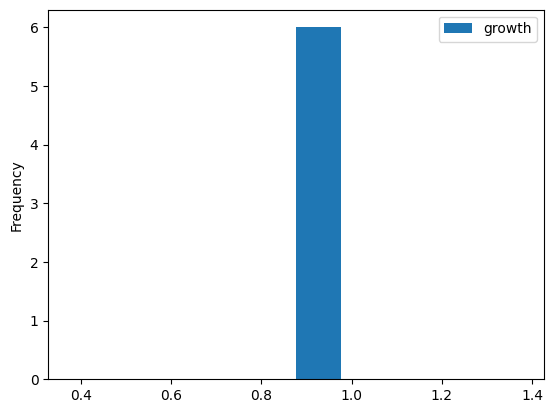

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.DataFrame.from_dict(essentiality, orient='index')
df = df.rename(columns={0: 'growth'})
df = df.sort_values('growth')
df.plot.hist()

In [40]:
medium = model.medium
with model:
    medium['EX_chtbs_e'] = 0
    model.medium = medium
    model.genes.get_by_id("b0677").knock_out()
    model.genes.get_by_id("b0678").knock_out()
    model.genes.get_by_id("b0679").knock_out()
    model.genes.get_by_id("b1817").knock_out()
    model.genes.get_by_id("b1818").knock_out()
    model.genes.get_by_id("b1819").knock_out()
    model.genes.get_by_id("b1101").knock_out()
    model.genes.get_by_id("b2415").knock_out()
    model.genes.get_by_id("b2416").knock_out()
    model.genes.get_by_id("b2417").knock_out()
    # gene integration
    reaction = Reaction("ExRe1")
    reaction.name = "GlcNAc-6-P N-Acetyltransferase"
    reaction.lower_bound = 0
    reaction.upper_bound = 1000
    
    reaction.add_metabolites({
        model.metabolites.get_by_id("ac_c"): -1.0,
        model.metabolites.get_by_id("gam6p_c"): -1.0,
        model.metabolites.get_by_id("acgam6p_c"): 1.0,
        model.metabolites.get_by_id("h2o_c"): 1.0
    })
    model.add_reactions([reaction])
    reaction = Reaction("ExRe2")
    reaction.name = "GlcNAc-6-P phosphatase"
    reaction.lower_bound = 0
    reaction.upper_bound = 1000
    
    reaction.add_metabolites({
        model.metabolites.get_by_id("acgam6p_c"): -1.0,
        model.metabolites.get_by_id("pyr_c"): -1.0,
        model.metabolites.get_by_id("pep_c"): 1.0,
        model.metabolites.get_by_id("acgam_p"): 1.0
    })
    model.add_reactions([reaction])
    model.objective = model.reactions.BIOMASS_Ec_iML1515_core_75p37M
    model.reactions.BIOMASS_Ec_iML1515_core_75p37M.lower_bound = model.optimize().objective_value
    model.objective = model.reactions.ExRe2
    solution = model.optimize()
    print(solution.fluxes[solution.fluxes != 0])
    print(solution.fluxes["GF6PTA"])
    print(solution.fluxes["G6PDA"])
    print(solution.fluxes["ACGAptspp"])
    print(solution.fluxes["ExRe1"])
    print(solution.fluxes["ExRe2"])
    print(solution.fluxes["BIOMASS_Ec_iML1515_core_75p37M"])
    

SHK3Dr                            3.306562e-01
DHORTS                           -2.869954e-01
OMPDC                             2.869954e-01
G5SD                              1.917858e-01
CS                                7.096230e+00
                                      ...     
PAI2T                             3.886817e-04
4HTHRK                            5.804197e-04
BIOMASS_Ec_iML1515_core_75p37M    8.675930e-01
ExRe1                            -4.083817e-13
ExRe2                            -4.083817e-13
Name: fluxes, Length: 439, dtype: float64
0.08197712961891312
0.0
0.0
-4.08381661820556e-13
-4.08381661820556e-13
0.8675930236571998
